# Modelagem Diabete Pime - Regressão Linear
#### Alex Cecconi de Souza 

## Preprocessamento dos dados

In [3]:
#Pacote de dados
import pandas as pd
import numpy as np

In [4]:
#importa dados
df = pd.read_excel(r"C:\Users\Alex\Desktop\Aprendizado_de_Maquina\Atividade_01\Diabete\Diabetes.xlsx")

In [5]:
df.head(n=12).T

,0,1,2,3,4,5,6,7,8,9,10,11
Pregnancies,6.000,1.000,8.000,1.000,0.0,5.000,3.000,10.000,2.000,8.000,4.000,10.000
Glucose,148.000,85.000,183.000,89.000,137.0,116.000,78.000,115.000,197.000,125.000,110.000,168.000
BloodPressure,72.000,66.000,64.000,66.000,40.0,74.000,50.000,0.000,70.000,96.000,92.000,74.000
SkinThickness,35.000,29.000,0.000,23.000,35.0,0.000,32.000,0.000,45.000,0.000,0.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.0,0.000,88.000,0.000,543.000,0.000,0.000,0.000
BMI,33.600,26.600,23.300,28.100,43.1,25.600,31.000,35.300,30.500,0.000,37.600,38.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2288.0,0.201,0.248,0.134,0.158,0.232,0.191,0.537
Age,50.000,31.000,32.000,21.000,33.0,30.000,26.000,29.000,53.000,54.000,30.000,34.000
Outcome,1.000,0.000,1.000,0.000,1.0,0.000,1.000,0.000,1.000,1.000,0.000,1.000


In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,81.627618,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,327.912860,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000


In [9]:
#Numa coluna valores maiores que 1 eu dividi por 10k, dado que valores maiores que 1 são anomalias por eero de dados
X.loc[(df.DiabetesPedigreeFunction > 1), 'DiabetesPedigreeFunction'] = X.loc[(df.DiabetesPedigreeFunction > 1), 'DiabetesPedigreeFunction']/10000

In [10]:
#Fazendo impute de valores nulos
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy='mean' )
X.iloc[:,1:5] = imp.fit_transform(X.iloc[:,1:5])

In [13]:
#Normalizando os dados
from sklearn import preprocessing 
Scaler = preprocessing.StandardScaler()
X.iloc[:,1:8] = Scaler.fit_transform(X.iloc[:,1:8])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_treino, X_test, y_treino, y_test = train_test_split(X,y, test_size=0.33, random_state=42, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_treino,y_treino, test_size=0.2, random_state=42, stratify = y_treino)

----------------
# Classificação Linear
Com esta equação nos encontramos os pesos \
$\overrightarrow{w} =  (  \gamma I + X^{t}X )^{-1}  X^{t}\overrightarrow{y}   $ \
Aqui é classificação \
$h(\overrightarrow{w}) = \overrightarrow{w} \cdot \overrightarrow{x}$

In [25]:
X = X_train.astype(float)
y = y_train.astype(float)

In [26]:
#Aplicando o gamma de regularização e avaliando o modeloa na base de validação
Valores = []
gama = 0
for gama in range(0,1000,10):
    omega2 = np.linalg.inv( np.multiply(gama,np.identity(8)) + X.T.dot(X)).dot(X.T).dot(y)
    F_x2 = omega2*X_valid.astype(float)
    Acuracia_reg = np.sum( np.where( (F_x2).sum(axis=1) >.4,1,0) == y_valid ) / y_valid.shape[0]
    Valores.append(Acuracia_reg)       

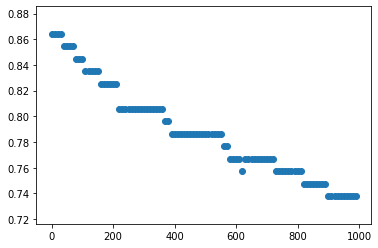

In [31]:
import matplotlib.pyplot as plt
plt.scatter(range(0,1000,10),Valores)
plt.show()

In [28]:
#Avaliando o modelo com a base de teste
omega2 = np.linalg.inv( X.T.dot(X)).dot(X.T).dot(y)
F_x2 = omega2*X_test.astype(float)
Acuracia_reg = np.sum( np.where( (F_x2).sum(axis=1) >.4,1,0) == y_test ) / y_test.shape[0]
round(Acuracia_reg,2)

0.71

# Fim